In [40]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arunayyappan3936/loan-eligibility-prediction",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-832812695.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'loan-eligibility-prediction' dataset.
First 5 records:     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0            

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Modified Columns

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for item in categorical_cols:
    df[item]=le.fit_transform(df[item])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [36]:
display(df.isna().sum())
display(df.info())
display(df['Dependents'].value_counts())

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


None

,count
Dependents,
0,345
1,102
2,101
3+,51


In [42]:
import pandas as pd
cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

df[cols] = df[cols].fillna(df[cols].median())
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Dependents'], drop_first=True,dtype=int)
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

/tmp/ipython-input-1541761450.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,0,0,0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

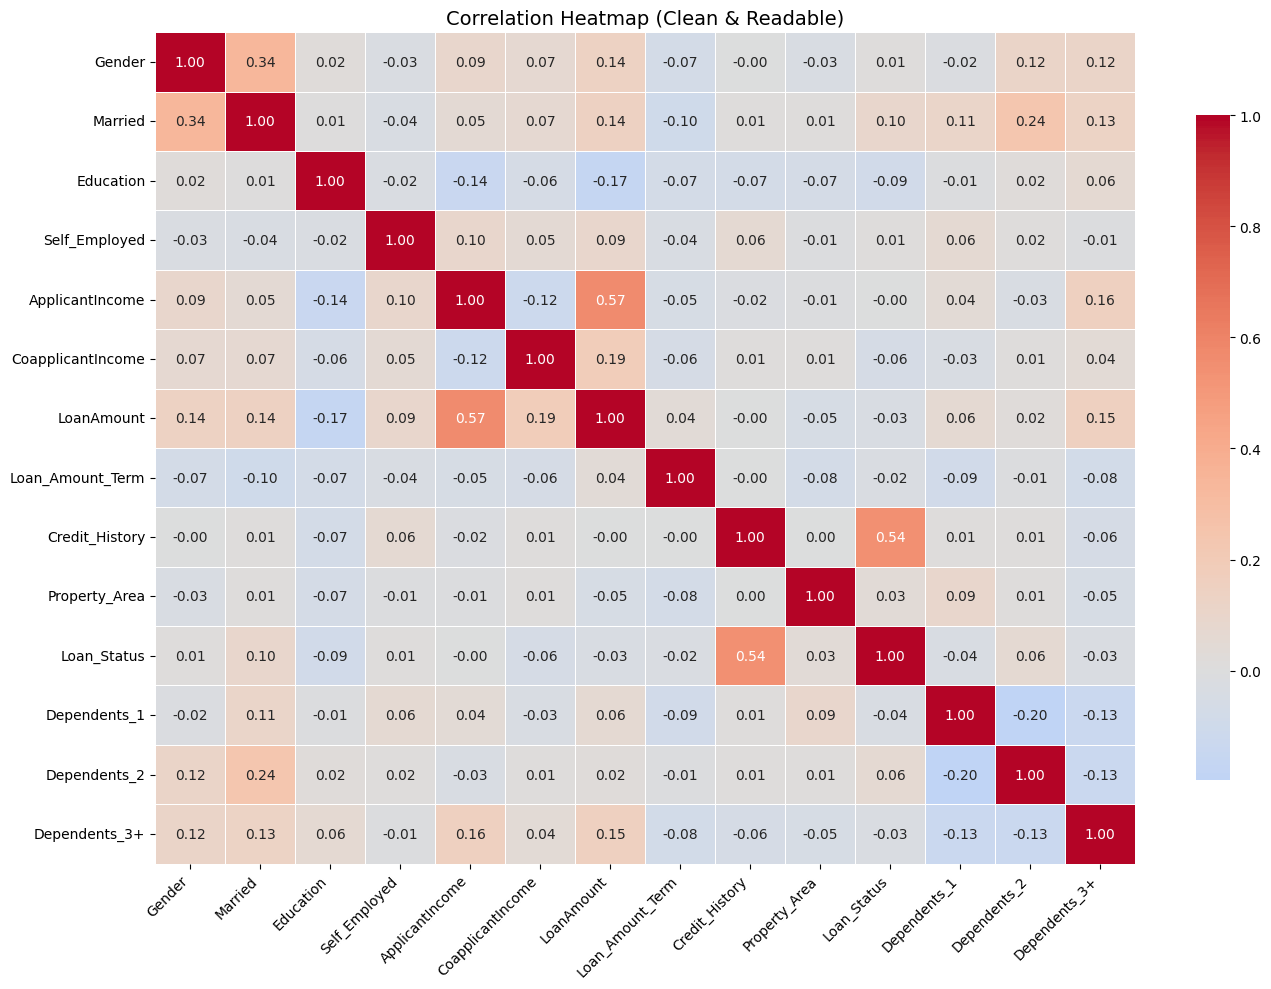

In [50]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,linewidths=0.5,
    cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap (Clean & Readable)", fontsize=14)
plt.tight_layout()
plt.show()

In [51]:
drop_cols = [
    'Gender',
    'Self_Employed',
    'CoapplicantIncome',
    'Loan_Amount_Term',
    'Property_Area'
]

df = df.drop(columns=drop_cols)


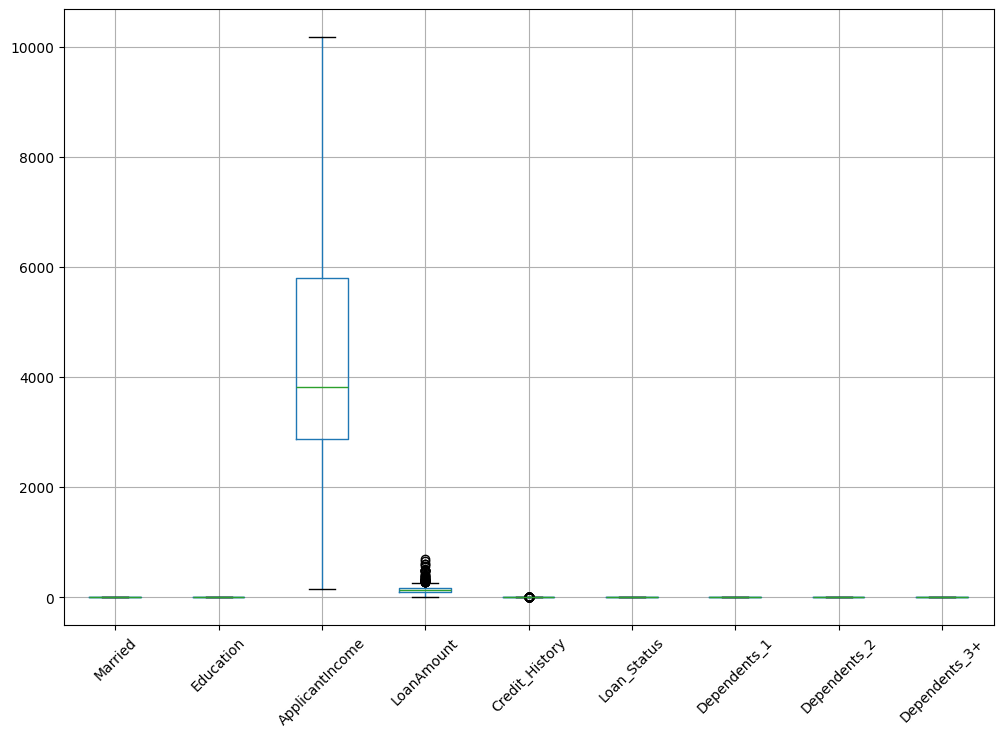

In [55]:
df.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

In [53]:
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df[col][outlier_mask]
    return outliers

int_cols = df.select_dtypes(include='int').columns.tolist()
outliers = detect_outliers_iqr(df, int_cols)

# Example to print outliers for each column
cols_with_outliers = [col for col, vals in outliers.items() if not vals.empty]
print(cols_with_outliers)

['Education', 'ApplicantIncome', 'Dependents_1', 'Dependents_2', 'Dependents_3+']


In [54]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

df_capped = cap_outliers_iqr(df, cols_with_outliers)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,f1_score
from sklearn.preprocessing import StandardScaler

In [57]:
model=LogisticRegression(max_iter=1000,random_state=42)
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled,Y_train)
y_pred=model.predict(X_test_scaled)
accuracy=accuracy_score(Y_test,y_pred)
print(classification_report(Y_test,y_pred))
print("Accuracy:",accuracy)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy: 0.7886178861788617


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,f1_score
from sklearn.preprocessing import StandardScaler

In [59]:
model=RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=42)
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled,Y_train)
y_pred=model.predict(X_test_scaled)
accuracy=accuracy_score(Y_test,y_pred)
print("classification_report",classification_report(Y_test,y_pred))
print("precision",precision_score(Y_test,y_pred))
print("f1_score",f1_score(Y_test,y_pred))
print("Accuracy:",accuracy)

classification_report               precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123

precision 0.7578947368421053
f1_score 0.8228571428571428
Accuracy: 0.7479674796747967


In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score

In [61]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',   # change to 'recall' if recall is priority
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

[[21 17]
 [ 1 84]]
Precision: 0.8316831683168316
F1 Score: 0.9032258064516129
Accuracy: 0.8536585365853658


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:00:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
